**K-Nearest Neighbours by Aana Kakroo (20BAI1138)**

# Data Cleaning

Import required libraries (pandas, numpy and matplotlib)

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the datasets

In [235]:
#load test.csv as test dataframe
test =pd.read_csv('https://raw.githubusercontent.com/aana0308/Task0-Titanic-Exploration/main/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [236]:
#load train.csv as train dataframe
train = pd.read_csv('https://raw.githubusercontent.com/aana0308/Task0-Titanic-Exploration/main/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Get information about the data in the datasets

In [237]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [238]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Check the number of NULL values in dataset and delete the rows with the NULL values

In [239]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [240]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [241]:
train = train.dropna()
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [242]:
test =test.dropna()
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Remove 'Name' and 'PassengerId' columns from dataset

In [243]:
train = train.drop(columns=['PassengerId','Name'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Sex       183 non-null    object 
 3   Age       183 non-null    float64
 4   SibSp     183 non-null    int64  
 5   Parch     183 non-null    int64  
 6   Ticket    183 non-null    object 
 7   Fare      183 non-null    float64
 8   Cabin     183 non-null    object 
 9   Embarked  183 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 15.7+ KB


In [244]:
test = test.drop(columns=['Name','PassengerId'])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    87 non-null     int64  
 1   Sex       87 non-null     object 
 2   Age       87 non-null     float64
 3   SibSp     87 non-null     int64  
 4   Parch     87 non-null     int64  
 5   Ticket    87 non-null     object 
 6   Fare      87 non-null     float64
 7   Cabin     87 non-null     object 
 8   Embarked  87 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 6.8+ KB


Getting statistical information about data in the dataset

In [245]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1.137931,39.247126,0.597701,0.482759,98.109198
std,0.435954,15.218730,0.637214,0.860801,88.177319
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,0.000000,0.000000,35.339600
50%,1.000000,39.000000,1.000000,0.000000,71.283300
75%,1.000000,50.000000,1.000000,1.000000,135.066650
max,3.000000,76.000000,3.000000,4.000000,512.329200


In [246]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


Checking for categorical variables

In [247]:
train.nunique()

Survived      2
Pclass        3
Sex           2
Age          63
SibSp         4
Parch         4
Ticket      127
Fare         93
Cabin       133
Embarked      3
dtype: int64

In [248]:
test.nunique()

Pclass       3
Sex          2
Age         46
SibSp        4
Parch        5
Ticket      66
Fare        58
Cabin       72
Embarked     3
dtype: int64

# Correlation Matrix

<AxesSubplot:>

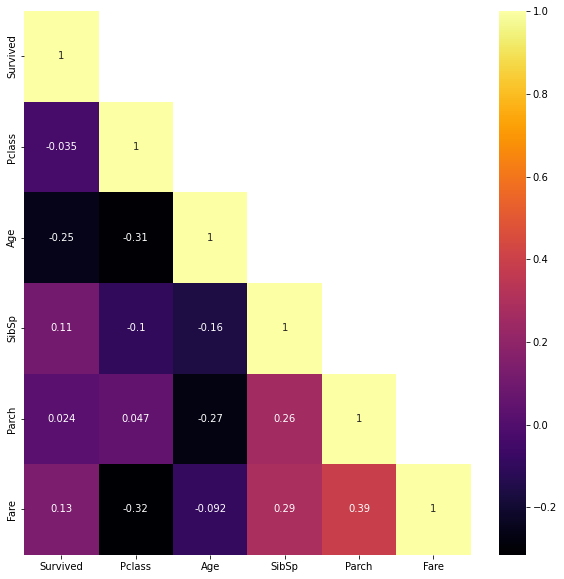

In [249]:
#plotting heat map for checking correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True,cmap='inferno',mask=np.triu(train.corr()
,k=1))

From the heatmap we can observe that there are no variables that are highly correlated and hence all of them can be used in building the model

# Outlier analysis

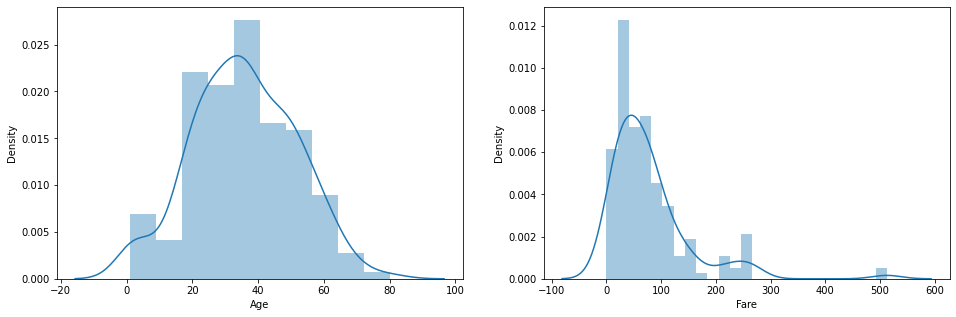

In [250]:
#Plot the Distribution plots for the features
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(train['Age'])
plt.subplot(1,2,2)
sns.distplot(train['Fare'])
plt.show()

As we can see from the above distribution plots, Age column does not have any outliers but Fare column does

In [251]:
#Finding the Boundary Values
print("Highest allowed",train['Fare'].mean() + 3*train['Fare'].std())
print("Lowest allowed",train['Fare'].mean() - 3*train['Fare'].std())

Highest allowed 307.72599695367614
Lowest allowed -150.36105924875812


In [252]:
#Finding the outliers
train[(train['Fare'] > 307.725) | (train['Fare'] < -150.361)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,1,1,male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,1,1,male,35.0,0,0,PC 17755,512.3292,B101,C


In [253]:
train = train[(train['Fare'] < 307.725) & (train['Fare'] > -150.361)]
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
6,0,1,male,54.0,0,0,17463,51.8625,E46,S
10,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,11751,52.5542,D35,S
872,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,1,1,female,56.0,0,1,11767,83.1583,C50,C
887,1,1,female,19.0,0,0,112053,30.0000,B42,S


In [254]:
#Capping on outliers
upper_limit = train['Fare'].mean() + 3*train['Fare'].std()
lower_limit = train['Fare'].mean() - 3*train['Fare'].std()

In [255]:
#Apply the capping
train['Fare'] = np.where(
    train['Fare']>upper_limit,
    upper_limit,
    np.where(
        train['Fare']<lower_limit,
        lower_limit,
        train['Fare']
    )
)

In [256]:
train['Fare'].describe()

count    181.000000
mean      73.744085
std       61.042012
min        0.000000
25%       29.700000
50%       56.929200
75%       90.000000
max      258.365991
Name: Fare, dtype: float64

# Data Visualisation

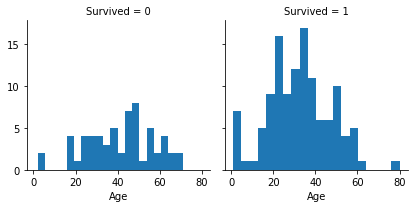

In [257]:
#bar plot for age vs survival
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

1. Infants (Age <=4) had high survival rate.
2. Oldest passengers (Age = 80) survived.
3. Large number of 15-25 year olds did not survive.
4. Most passengers are in 15-35 age range.

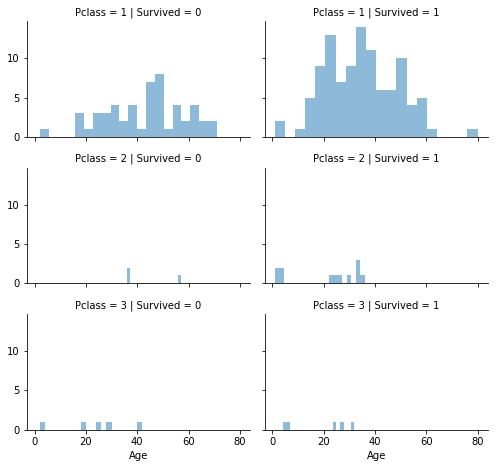

In [258]:
#bar plot for 
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

1. Pclass=3 had most passengers, however most did not survive. 
2. Infant passengers in Pclass=2 and Pclass=3 mostly survived.
3. Most passengers in Pclass=1 survived.
4. Pclass varies in terms of Age distribution of passengers.

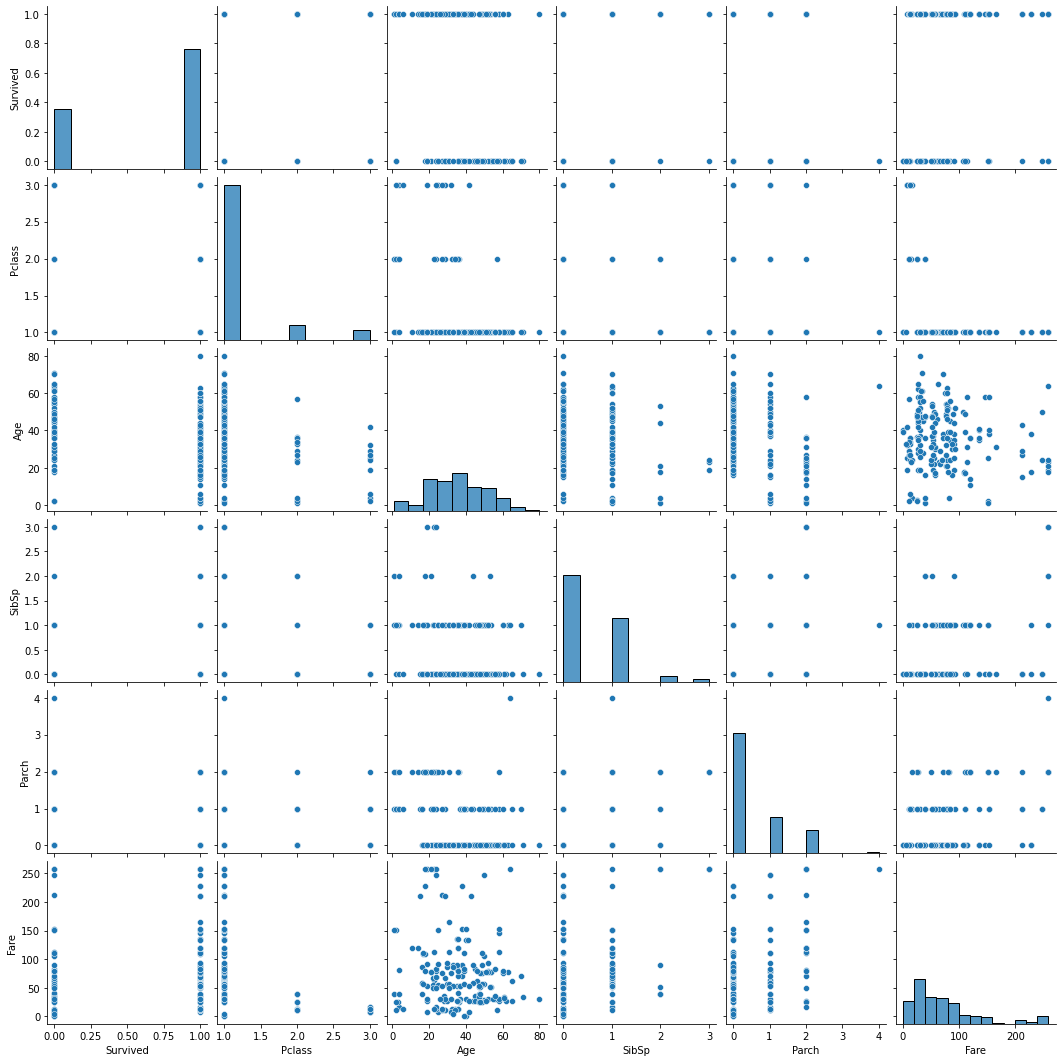

In [259]:
sns.pairplot(train)

# Label Encoding

In [260]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'Sex' and 'Embarked'.
train['Sex']= label_encoder.fit_transform(train['Sex'])
train['Sex'].unique()

train['Embarked']= label_encoder.fit_transform(train['Embarked'])
train['Embarked'].unique()

array([0, 2, 1])

In [261]:
#do the same as above for test dataframe
# Encode labels in column 'sex' and 'Embarked'.
test['Sex']= label_encoder.fit_transform(test['Sex'])
test['Sex'].unique()

test['Embarked']= label_encoder.fit_transform(test['Embarked'])
test['Embarked'].unique()

array([2, 0, 1])

# Model building

In [262]:
#import the required python libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [263]:
#delete ticket and cabin column as its not needed in the model
train = train.drop(['Ticket','Cabin'],axis=1)
train.info()
# Create feature and target arrays
X = train.drop(['Survived'],axis=1)
y = train['Survived']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 1 to 889
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  181 non-null    int64  
 1   Pclass    181 non-null    int64  
 2   Sex       181 non-null    int32  
 3   Age       181 non-null    float64
 4   SibSp     181 non-null    int64  
 5   Parch     181 non-null    int64  
 6   Fare      181 non-null    float64
 7   Embarked  181 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 15.4 KB


In [264]:
knn = KNeighborsClassifier(n_neighbors=5)
 
knn.fit(X, y)

KNeighborsClassifier()

In [265]:
# Calculate the accuracy of the model
print(knn.score(X, y))

0.7458563535911602


In [266]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    87 non-null     int64  
 1   Sex       87 non-null     int32  
 2   Age       87 non-null     float64
 3   SibSp     87 non-null     int64  
 4   Parch     87 non-null     int64  
 5   Ticket    87 non-null     object 
 6   Fare      87 non-null     float64
 7   Cabin     87 non-null     object 
 8   Embarked  87 non-null     int32  
dtypes: float64(2), int32(2), int64(3), object(2)
memory usage: 6.1+ KB


Drop cabin and ticket columns from test as well

In [267]:
test = test.drop(['Cabin','Ticket'],axis=1)

In [268]:
#prediciton using the model
X_test = test
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

Finding best k value for algorithm

In [269]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

Text(0, 0.5, 'Error Rate')

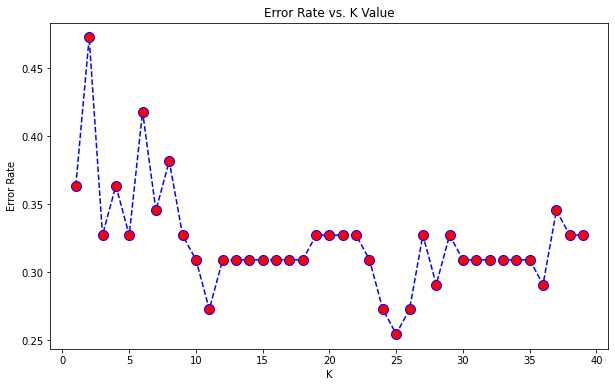

In [271]:
error_rate = []
for i in range(1, 40):     
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Thus, we can conclude that KNN model is suitable for predicting the survival of the passengers in the titanic according to the given dataset.